### Things to do
- [x] Import images as separate directory
- [ ] Use os to import the images rather than hard coding it
- [x] Convertion of rgb to grayscale
- [x] Cropping the image to only manipulation zone
- [x] Resize of the image (Not required)
- [x] K-means clustering
- [ ] Distance Transform 

In [34]:
# Importing the image and visualizing it.

import cv2
import pandas as pd
image = cv2.imread("/home/lil-e-va/Downloads/ML_project/empty_-_detection_ML/data/image_003.jpg",0)
print(f'The size of the image: {image.shape}')

# Creating the dataframe
dataframe_image = pd.DataFrame(image)
dataframe_image.to_csv("/home/lil-e-va/Downloads/ML_project/empty_-_detection_ML/data/Image_values.csv")

cv2.imshow('Original',image)
cv2.waitKey(0)

cv2.destroyAllWindows()

The size of the image: (480, 640)


In [55]:
'''
Cropping the image
ref - https://learnopencv.com/cropping-an-image-using-opencv/
'''

cropped_image = image[150:410,30:640]
print(cropped_image.shape)
cv2.imshow("cropped", cropped_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

(260, 610)


**Is it a wise option to resize the image??? Use Cropped Image for now.**

In [56]:
'''
Resizing the image
ref - https://learnopencv.com/image-resizing-with-opencv/
'''

downscale_val = (256,256)
imgresized = cv2.resize(cropped_image,downscale_val,interpolation=cv2.INTER_AREA)

print(imgresized.shape)
cv2.imshow('resize_image',imgresized)
cv2.waitKey(0)

cv2.destroyAllWindows()

(256, 256)


### _Image Segmentation with K-means_

In [97]:
'''
Image Segmentation with Kmeans
ref - https://www.kaggle.com/code/hal1001k/image-segmentation-with-kmeans
'''

from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import numpy as np

img; (260, 610, 3)


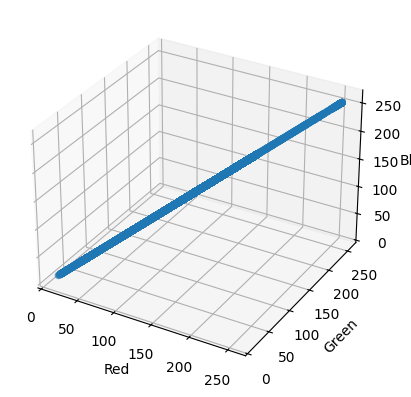

In [123]:
'''
Converting 3D image into numpy array to 2D
'''

# img = cv2.cvtColor(imgresized,cv2.COLOR_BGR2RGB)B does???
img = cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB)

print(f'img; {img.shape}')
r,g,b = cv2.split(img)

# print(f'r:{r}')

r = r.flatten()
g = g.flatten()
b = b.flatten()

# print(f'r: {r}')
# print(f'g: {g}')
# print(f'b: {b}')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# ax.scatter(r,g,b)
ax.scatter(r, g, b)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

### _Reshaping np array in 2D to perform kmeans_

In [124]:
vectorized = img.reshape((-1,3))
# print(f'vectorized: {vectorized.shape}')
vectorized = np.float32(vectorized)
# print(f'vectorized: {vectorized.shape}')

# What is the criteria function has to do???
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
K = 3
attempts = 10

# Have to understand what the following function does????

ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

label = label.flatten()

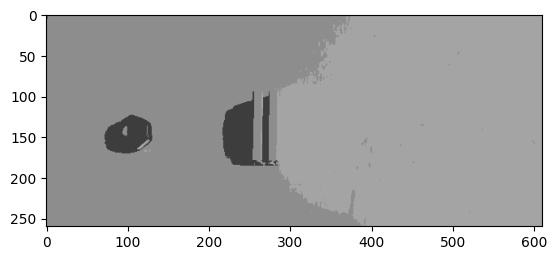

In [122]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.imshow(result_image)
plt.show()

### _Comparing Original and Segmented Image_

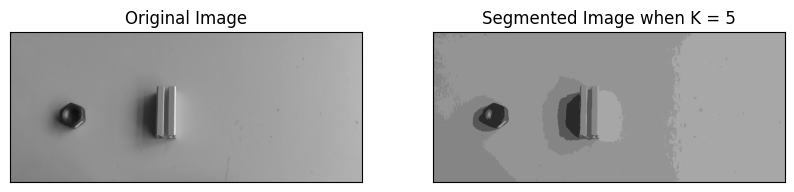

In [111]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# This cell is not required to run as, conversion of the RBG to black is alreadu taken care in the above cell

'''
Converting the image into Grayscale image
ref - "https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/"
'''

# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2.imshow('Gray_Scale image',gray_image)
# cv2.waitKey(0)



# cv2.destroyAllWindows()

'\nConverting the image into Grayscale image\nref - "https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/"\n'